<a href="https://colab.research.google.com/github/RadhikaRM/Playstore-Data-Analysis/blob/main/PlayStore_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem statement**
## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for category, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b> 

Google Play Store is a major app distribution platform for Android users.There are thousands of applications for various purposes available here.As a result,the competition in the app market is quite fierce.To carve their niche in this market,companies should go about it very strategically.App developers would benefit greatly from knowing what works and what does not work on Playstore.

> ***There comes data to our rescue!***

We can make use of historical data of Apps in Playstore.The Playstore apps data available to us contain details regarding the category,rating,size and several other factors about the apps.We also have another dataset containing the customer reviews of Android apps.
By performing Exploratory Data Analysis on these datasets,we can figure out the key factors responsible for App Engagement  and Success.

So,let's get started!


First,we import the libraries and modules which we have to use in this analysis.

## **Importing the required libraries**

In [1]:
#importing the required libraries and modules
#data wrangling
import pandas as pd
import numpy as np
#data visualization
import seaborn as sns
sns.set_style('white')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#importing datetime module
from datetime import datetime
#To create wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
#to ignore the warnings
import warnings
warnings.filterwarnings('ignore')



## **Bringing in the data**


In [2]:
#mounting the drive containing the data files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [78]:
#reading the playstore data and user reviews data
PS_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone projects/Project 1- Playstore Data Analysis/ PlayStore_Data.csv')
UR_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone projects/Project 1- Playstore Data Analysis/ User_Reviews.csv')


---
## **Data cleaning and preparation** 


***“No data is clean, but most is useful.***”~ Dean Abbott

An important part of the data analysis process is Data Cleaning.  Only when the data has been cleaned can it be analysed and transformed into something beneficial.



>## ***Playstore data***


In [79]:
#To display the first 3 observations of the data 
PS_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [80]:
#To display the last 3 observations of the data 
PS_df.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### **Data Description of Playstore dataframe**

The **PS_df** contains **10841** rows and **13** columns in total.
The columns present in the Play Store dataframe are:

1.   **App :** Name of the application
2.  **Category**: Category in which the app belongs
3.   **Rating**: Rating given by users to the particular app
4.  **Reviews**: The number of reviews received by the app
5.  **Size**: The amount of space required for app installation
5.  **Installs**: The number of installations of the app 
6.   **Type**: The type of the app ,whether its free or paid
7.   **Price**: The price of the app
8.   **Content rating**:The targeted audience of the app
9.   **Genres**: The genre of content offered by the app
10.  **Last updated**:The date on which the app was last updated
11.  **Current Ver**:The current version of the app
12.  **Android Ver**: The Andriod version(s) supported by the app


In [81]:
def dataframe_info(df):
  ''' 
  Returns a dataframe displaying the column datatypes,
  count of unique values and count & percent of missing values in the dataframe
  '''
  info_df=df.isnull().sum().reset_index()
  info_df.rename(columns={'index':'Column_name',0:'NaN_count'},inplace=True)
  info_df['% of  NaN']=round((info_df['NaN_count']/len(df))*100,2)
  info_df['dtype']=df.dtypes.values
  info_df['Unique_count']=df.nunique(axis=0).values
  return(info_df)

In [82]:
#To understand the datatypes of features in playstore data and to determine the count of missing values
dataframe_info(PS_df)

,Column_name,NaN_count,% of NaN,dtype,Unique_count
0,App,0,0.00,object,9660
1,Category,0,0.00,object,34
2,Rating,1474,13.60,float64,40
3,Reviews,0,0.00,object,6002
4,Size,0,0.00,object,462
5,Installs,0,0.00,object,22
6,Type,1,0.01,object,3
7,Price,0,0.00,object,93
8,Content Rating,1,0.01,object,6
9,Genres,0,0.00,object,120


* It is evident that the dataset contains several null values.
* The datatypes of columns such as Size,Installs,Rating,Price,Content Rating are incorrect

In [83]:
#displaying the unique values of some columns in PS_df
for col in PS_df.columns:
  if PS_df[col].nunique()<500:
    print(f"The unique values in {col} column are :")
    print(PS_df[col].unique())
    print('\n')

The unique values in Category column are :
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


The unique values in Rating column are :
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]


The unique values in Size column are :
['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Va

Besides null values,the data could also  contain  duplicate values, values with incorrect datatypes and formats,irrelevant columns and outliers . It is important to replace/remove these values before proceeding with the analysis. So let's get to work and treat them right!

### **Dropping Duplicate rows**

In [84]:
#finding the number of duplicates in 'App' column
PS_df.duplicated(['App']).value_counts()

False    9660
True     1181
dtype: int64

In [85]:
# Updates the playstore dataframe with duplicate rows removed
PS_df.sort_values(["App","Reviews"],inplace=True)
PS_df.drop_duplicates("App","last",inplace=True)
PS_df.reset_index(drop=True,inplace=True)

### **Handling missing or NaN values**




>**Treating null value in 'Type' column**

In [86]:
#identifying the app with type NaN
PS_df[PS_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2641,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


After cross-checking in the Google Playstore,I have identified that this app belongs to the Type 'Free'

In [87]:
#Filling the type of the app as Free
PS_df['Type'].fillna("Free", inplace = True)

>**Treating null value in 'Content Rating' column**


In [88]:
#identifying the app with Content Rating NaN
PS_df[PS_df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5806,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The value of category  and genres column is missing in this row .This app belongs to 'LIFESTYLE' category and the same genre. 

In [89]:
#Filling in the values for Category and Genres
PS_df.loc[5806, :] = ['Life Made WI-Fi Touchscreen Photo Frame', 'LIFESTYLE',1.9, 19.0, '3.0M',
       '1,000+', 'Free', '0', 'Everyone', 'Lifestyle', 'February 11, 2018',
       '1.0.19', '4.0 and up']
PS_df.loc[5806, :]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        LIFESTYLE
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                          Lifestyle
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 5806, dtype: object

>**Treating the null values in 'Rating' column**


As seen earlier,The 'Rating' column has 1474 null values which accounts to a significant amount of data .So,dropping rows containing null values of Rating can drastically affect our analysis.

In [90]:
#Statistical description of Rating column
PS_df['Rating'].describe()

count    8197.000000
mean        4.172807
std         0.537077
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Most of the values in the Rating column lie above 4,indicating that the distribution is positively skewed.So, it is wise to better to replace the null values with the median value of Rating.

In [91]:
#taking median value of the rating column and replace NaN values in it with it
rating_median = PS_df['Rating'].median()

In [92]:
#Replacing the NaN values of  "Rating" with the median value
PS_df['Rating'].fillna(value=rating_median, inplace = True)

>**Treating the null values in 'Android Ver'**  





In [93]:
#Taking the mode of the values in  'Android Ver' to impute inplace of  NaN values 
PS_df['Android Ver']=PS_df['Android Ver'].fillna(value=PS_df['Android Ver'].mode())


In [94]:
#check if the playstore dataframe has any null values to ensure that all modifications are in place
PS_df.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

Perfect!No more null values



### **Correcting data types**



Reviews, Size, Installs, and Price should have numeric datatypes, but we find object type here, therefore let's convert them to their respective data types.


>  **Correcting datatype of 'Reviews' column**

In [95]:
#Changing datatype for "Reviews" column
PS_df['Reviews'] = PS_df['Reviews'].astype(float)


>  **Correcting datatype of 'Size' column**

In [96]:
#the count of number of apps with the same size 
PS_df['Size'].value_counts()

Varies with device    1227
11M                    182
12M                    181
13M                    177
14M                    177
                      ... 
458k                     1
245k                     1
775k                     1
28k                      1
549k                     1
Name: Size, Length: 461, dtype: int64

In [97]:
# Replacing/removing the string characters in  "Size" column

PS_df['Size'] = PS_df.Size.apply(lambda x: x.replace(',', ''))
PS_df['Size'] = PS_df.Size.apply(lambda x: x.replace('M', 'e+6'))
PS_df['Size'] = PS_df.Size.apply(lambda x: x.replace('k', 'e+3'))

#For the time being,replacing 'Varies with device' with Nan 
PS_df['Size'] = PS_df.Size.replace('Varies with device', np.NaN)

In [98]:
#Changing datatype for "Size" column
PS_df['Size']= PS_df['Size'].apply(pd.to_numeric)

In [99]:
#Converting the value in bytes to megabytes for easier interpretation
PS_df['Size']=PS_df['Size']/(10**6) 

In [100]:
#determining the mean,median of Apps sizes excluding the apps with Nan values
PS_df[PS_df['Size']!=np.nan]['Size'].describe()

count    8433.000000
mean       20.390997
std        21.825333
min         0.008500
25%         4.600000
50%        12.000000
75%        28.000000
max       100.000000
Name: Size, dtype: float64

Majority of the apps have size that 'Varies with device'.Keeping those apps aside,we see that  minimum size of apps in the dataset is 8.5KB and the maximum size is 100 MB.It looks like 75% of the apps in playstore are sized under 28 MB. The median value of size is 12MB and mean size is 20MB.


>**Correcting datatype of 'Installs' column**

In [101]:
#Displaying the unqiue values in Installs column
PS_df['Installs'].unique()

array(['500+', '1,000,000+', '10,000+', '100+', '100,000+', '500,000+',
       '10,000,000+', '5,000+', '50,000+', '5+', '1,000+', '10+',
       '50,000,000+', '100,000,000+', '5,000,000+', '50+', '0+', '1+',
       '500,000,000+', '0', '1,000,000,000+'], dtype=object)

In [102]:
# Replacing/removing the string characters in "Installs" column
PS_df['Installs']=PS_df['Installs'].apply(lambda x: x.strip('+'))
PS_df['Installs']=PS_df['Installs'].apply(lambda x: x.replace(',',''))

#Changing datatype for "Installs" column
PS_df['Installs']=PS_df['Installs'].astype(int)

In [103]:
PS_df['Installs'].describe()

count    9.660000e+03
mean     7.779403e+06
std      5.375731e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

About 75% of apps in Playstore have installations under 1 Million.The maximum number of downloads for an app/apps is 100 Million.There are also quite a few apps which have been not installed at all.


> **Correcting datatype of 'Price' column**

In [104]:
# Replacing/removing the string characters in "Price" column
PS_df['Price']=PS_df['Price'].apply(lambda x: x.replace('$',''))

#Changing datatype for "Price" column
PS_df['Price']=PS_df['Price'].astype(float)

> **Correcting datatype of 'Last updated' column**

In [105]:
#Changing the datatype of column "Last updated" and extracting year and month of last update 
PS_df['Last Updated']=PS_df['Last Updated'].apply(lambda x : datetime.strptime(x,"%B %d, %Y"))


### **Sanity checks**

In [106]:
PS_df[(PS_df['Installs']==0)&PS_df['Rating']>0]#rated apps with zero installs and reviews

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,AP Series Solution Pro,FAMILY,4.3,0.0,7.4,0,Paid,1.99,Everyone,Education,2017-07-30,1.3,4.0 and up
580,Ain Arabic Kids Alif Ba ta,FAMILY,4.3,0.0,33.0,0,Paid,2.99,Everyone,Education,2016-04-15,1.0,3.0 and up
596,Ak Parti Yardım Toplama,SOCIAL,4.3,0.0,8.7,0,Paid,13.99,Teen,Social,2017-07-28,3.4.4.3.3,4.1 and up
2253,CX Network,BUSINESS,4.3,0.0,10.0,0,Free,0.00,Everyone,Business,2018-08-06,1.3.1,4.1 and up
2641,Command & Conquer: Rivals,FAMILY,4.3,0.0,NaN,0,Free,0.00,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device
3611,EG | Explore Folegandros,TRAVEL_AND_LOCAL,4.3,0.0,56.0,0,Paid,3.99,Everyone,Travel & Local,2017-01-22,1.1.1,4.1 and up
3677,EP Cook Book,MEDICAL,4.3,0.0,3.2,0,Paid,200.00,Everyone,Medical,2015-07-26,1.0,3.0 and up
4015,Eu Sou Rico,FINANCE,4.3,0.0,1.4,0,Paid,394.99,Everyone,Finance,2018-07-11,1.0,4.0.3 and up
4016,Eu sou Rico,FINANCE,4.3,0.0,2.6,0,Paid,30.99,Everyone,Finance,2018-01-09,1.0,4.0 and up
5328,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0.0,40.0,0,Paid,399.99,Everyone,Lifestyle,2017-12-01,MONEY,4.1 and up


Ratings given without installing the app ,does not truely represent people's opinion.So let's drop these rows

In [107]:
PS_df.drop(PS_df[(PS_df['Installs']==0)&(PS_df['Rating']>0)].index , inplace=True)

### **Outlier treatment**

In [108]:
#list of  columns
columns=['Reviews','Installs', 'Price']

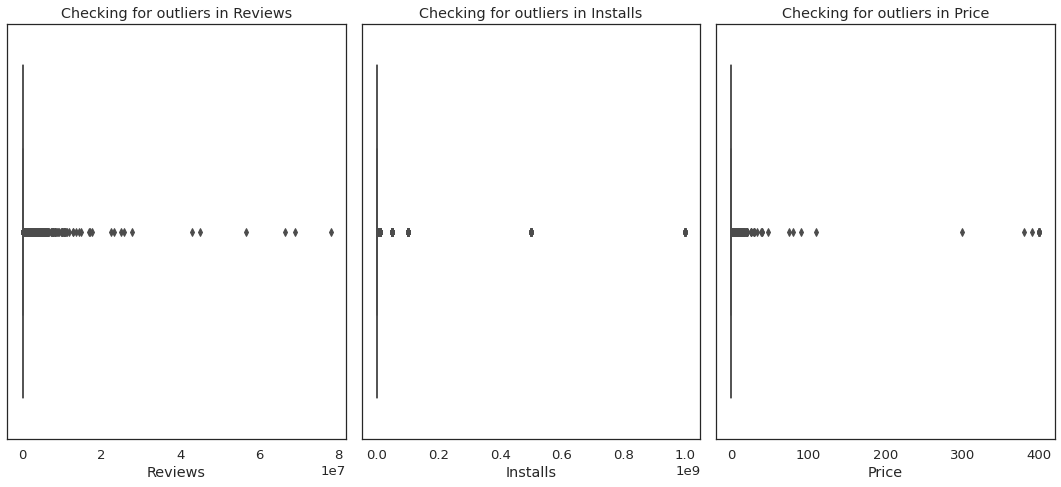

In [109]:
#checking for outliers
fig = plt.figure(figsize=(15,7))
c=1
for i in columns:
  plt.subplot(1,3,c)
  sns.boxplot(PS_df[i])
  plt.title('Checking for outliers in {}'.format(i))
  c+=1
plt.tight_layout()


**Inspecting the outliers in Installs column**

In [110]:
#inspecting the apps with 100M+ downloads
installs_100M_above=PS_df[PS_df['Installs']>=(10**8)].sort_values(by='Installs',ascending=False)[['App','Category','Installs','Reviews']]
installs_100M_above

,App,Category,Installs,Reviews
4939,Google Play Games,FAMILY,1000000000,7168735.0
8080,Subway Surfers,GAME,1000000000,27725352.0
4938,Google Play Books,BOOKS_AND_REFERENCE,1000000000,1433233.0
4949,Google+,SOCIAL,1000000000,4831125.0
4937,Google Photos,PHOTOGRAPHY,1000000000,10859051.0
...,...,...,...,...
4757,"GO Keyboard - Emoticon keyboard, Free Theme, GIF",PERSONALIZATION,100000000,2591941.0
4758,GO Launcher - 3D parallax Themes & HD Wallpapers,PERSONALIZATION,100000000,7464996.0
4762,"GO SMS Pro - Messenger, Free Themes, Emoji",COMMUNICATION,100000000,2876500.0
4809,Garena Free Fire,GAME,100000000,5534114.0


In [111]:
reviews_1M_above=PS_df[PS_df['Reviews']>=(10**6)].sort_values(by='Reviews',ascending=False)[['App','Category','Installs','Reviews']]
reviews_1M_above


,App,Category,Installs,Reviews
4328,Facebook,SOCIAL,1000000000,78158306.0
9042,WhatsApp Messenger,COMMUNICATION,1000000000,69119316.0
5399,Instagram,SOCIAL,1000000000,66577446.0
6166,Messenger – Text and Video Chat for Free,COMMUNICATION,1000000000,56646578.0
2564,Clash of Clans,GAME,100000000,44893888.0
...,...,...,...,...
5671,LINE WEBTOON - Free Comics,COMICS,10000000,1013944.0
5598,KineMaster – Pro Video Editor,VIDEO_PLAYERS,50000000,1013867.0
68,3D Tennis,SPORTS,50000000,1008012.0
5575,Kick the Buddy,GAME,50000000,1004709.0


It is highly likely that certain apps have more installs and reviews than average.So,the occurence of such large values are justifiable.

**Handling outliers in 'Price' column**

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 <a list of 7 Text major ticklabel objects>)

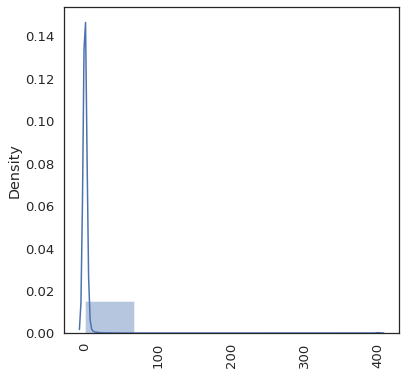

In [112]:
#Price distibution plot for paid apps
plt.figure(figsize = (6,6))
Paid_apps_df=PS_df[PS_df['Type']=='Paid']
sns.distplot(x=PS_df['Price'],bins=6)
plt.xticks(rotation=90)

Most of the paid apps are priced under 100.Which are the apps priced above 100?Let's find out

In [113]:

# Apps whose Price is greater than or equal to 100

apps_equal_or_above_100= PS_df[PS_df['Price'] >99]
apps_equal_or_above_100[['Category', 'App', 'Price','Installs']]
#['Category',= 'App', 'Price','Installs']


,Category,App,Price,Installs
1210,EVENTS,BP Fitness Lead Scanner,109.99,1
5298,FINANCE,I AM RICH PRO PLUS,399.99,1000
5300,FAMILY,I Am Rich,389.99,10000
5301,FINANCE,I Am Rich Premium,399.99,50000
5302,FAMILY,I Am Rich Pro,399.99,5000
5315,FINANCE,I am Rich,399.99,5000
5317,FAMILY,I am Rich Plus,399.99,10000
5319,FINANCE,I am Rich!,399.99,1000
5320,LIFESTYLE,I am extremely Rich,379.99,1000
5321,LIFESTYLE,I am rich,399.99,100000


Most of these apps appear to be junk applications judging by their names. So, it is better to drop these rows

In [114]:
#Percentage of apps in Playstore which have price greater than 100
(len(apps_equal_or_above_100)/len(PS_df))*100 #insignifcant contribtion to the entire data

0.16588906168999482

In [115]:
#Dropping rows with abnormally high prices
PS_df.drop(apps_equal_or_above_100.index, inplace = True)

###**Creating new columns**

In [116]:
# segment and sort the numeric data values in Size column into bins
#Creating Size_groups
def size_group(app_size):
  '''
  This function is used to segment and sort numeric data values in Size column into groups
  '''
  if app_size<1:
    return('<1MB')
  elif app_size>1 and app_size<=10:
    return('1MB-10MB') 
  elif app_size>10 and app_size<=20:
    return('10MB-20MB')
  elif app_size>20 and app_size<=30:
    return('20MB-30MB')
  elif app_size>30 and app_size<=40:
    return('30MB-40MB')
  elif app_size>40 and app_size<=50:
    return('40MB-50MB')
  elif app_size>50 and app_size<=60:
    return('50MB-60MB') 
  elif app_size>60 and app_size<=70:
    return('60MB-70MB')
  elif app_size>70 and app_size<=80:
    return('70MB-80MB')
  elif app_size>80 and app_size<=90:
    return('80MB-90MB')
  elif app_size>90 and app_size<=100:
    return('90MB-100MB')   
  else:
    return('Varies with device')  

In [117]:
#Creating size group from 'Size' column
PS_df['Size_group']=PS_df['Size'].apply(lambda x:size_group(x))

In [118]:
#Extracting year from 'Last Updated' column
PS_df['Last_update_year']=PS_df['Last Updated'].apply(lambda x :x.year)


In [119]:
#Log transformed Installs
PS_df['log_installs']=np.log10(PS_df['Installs'])


### **Dropping unwanted columns**

In [120]:
PS_df['Category'].unique()

array(['SPORTS', 'SOCIAL', 'COMICS', 'TOOLS', 'COMMUNICATION',
       'NEWS_AND_MAGAZINES', 'HEALTH_AND_FITNESS', 'FAMILY',
       'BOOKS_AND_REFERENCE', 'LIFESTYLE', 'BUSINESS', 'SHOPPING',
       'MEDICAL', 'GAME', 'FINANCE', 'PERSONALIZATION', 'PHOTOGRAPHY',
       'TRAVEL_AND_LOCAL', 'DATING', 'PRODUCTIVITY', 'ART_AND_DESIGN',
       'FOOD_AND_DRINK', 'VIDEO_PLAYERS', 'HOUSE_AND_HOME',
       'MAPS_AND_NAVIGATION', 'EVENTS', 'EDUCATION', 'AUTO_AND_VEHICLES',
       'WEATHER', 'BEAUTY', 'ENTERTAINMENT', 'LIBRARIES_AND_DEMO',
       'PARENTING'], dtype=object)

In [121]:
#Retaining the the main genre value in 'Genres' column 
PS_df['Genres']=PS_df['Genres'].apply(lambda x: x.split(';')[0])
#displaying the unique values in 'Genres' column
PS_df['Genres'].unique()

array(['Sports', 'Social', 'Comics', 'Tools', 'Communication',
       'News & Magazines', 'Health & Fitness', 'Education',
       'Books & Reference', 'Puzzle', 'Lifestyle', 'Business', 'Shopping',
       'Medical', 'Board', 'Finance', 'Action', 'Personalization',
       'Casual', 'Arcade', 'Photography', 'Travel & Local',
       'Entertainment', 'Dating', 'Productivity', 'Art & Design',
       'Simulation', 'Food & Drink', 'Video Players & Editors', 'Racing',
       'Adventure', 'House & Home', 'Maps & Navigation', 'Events',
       'Educational', 'Casino', 'Card', 'Auto & Vehicles', 'Weather',
       'Beauty', 'Strategy', 'Music', 'Libraries & Demo', 'Role Playing',
       'Trivia', 'Parenting', 'Word', 'Music & Audio'], dtype=object)

The elements in Category and Genres are  mostly the same.Therefore, dropping the Genres column.


In [122]:
#Displaying the unique Genres in each category
for cat in PS_df['Category'].unique():
  print('Category name : ',cat)
  df=PS_df[PS_df['Category']==cat]
  print(f'There are {df.Genres.nunique()} unique main genres')
  print(df['Genres'].value_counts())
  print('\n')

Category name :  SPORTS
There are 1 unique main genres
Sports    325
Name: Genres, dtype: int64


Category name :  SOCIAL
There are 1 unique main genres
Social    237
Name: Genres, dtype: int64


Category name :  COMICS
There are 1 unique main genres
Comics    56
Name: Genres, dtype: int64


Category name :  TOOLS
There are 1 unique main genres
Tools    828
Name: Genres, dtype: int64


Category name :  COMMUNICATION
There are 1 unique main genres
Communication    315
Name: Genres, dtype: int64


Category name :  NEWS_AND_MAGAZINES
There are 1 unique main genres
News & Magazines    253
Name: Genres, dtype: int64


Category name :  HEALTH_AND_FITNESS
There are 1 unique main genres
Health & Fitness    288
Name: Genres, dtype: int64


Category name :  FAMILY
There are 24 unique main genres
Entertainment              502
Education                  472
Casual                     203
Simulation                 197
Puzzle                     119
Role Playing               103
Educational      

In [123]:
PS_df.loc[PS_df['Category']=='FAMILY','Content Rating'].value_counts()#Content Rating of apps in the Family category

Everyone        1450
Teen             255
Everyone 10+     117
Mature 17+        50
Unrated            1
Name: Content Rating, dtype: int64

In [124]:
PS_df.loc[(PS_df['Category']=='FAMILY')& PS_df['Genres'].isin(['Music & Audio','Music','Sports','Communication'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_group,Last_update_year,log_installs
1457,Basketball FRVR - Shoot the Hoop and Slam Dunk!,FAMILY,4.5,4076.0,NaN,100000,Free,0.00,Everyone,Sports,2018-08-01,1.3.3,4.1 and up,Varies with device,2018,5.00000
2119,CN Superstar Soccer: Goal!!!,FAMILY,4.1,3863.0,41.0,100000,Paid,2.99,Everyone,Sports,2018-05-24,1.1.1,4.1 and up,40MB-50MB,2018,5.00000
5755,Learn Music Notes,FAMILY,4.7,143.0,4.4,1000,Paid,1.99,Everyone,Music,2018-06-17,1.2.1,2.2 and up,1MB-10MB,2018,3.00000
5992,Madden NFL Football,FAMILY,4.5,1455952.0,NaN,10000000,Free,0.00,Everyone,Sports,2018-05-15,4.3.6,4.0 and up,Varies with device,2018,7.00000
6160,Messenger Kids – Safer Messaging and Video Chat,FAMILY,4.2,3478.0,NaN,500000,Free,0.00,Everyone,Communication,2018-08-06,33.0.0.22.76,4.4 and up,Varies with device,2018,5.69897
6489,NBA JAM by EA SPORTS™,FAMILY,4.3,56444.0,43.0,500000,Paid,4.99,Everyone,Sports,2017-02-08,04.00.40,2.3 and up,40MB-50MB,2017,5.69897
6990,Piano Kids - Music & Songs,FAMILY,4.6,46741.0,50.0,10000000,Free,0.00,Everyone,Music,2018-08-03,1.73,4.0.3 and up,40MB-50MB,2018,7.00000
7475,Rhythm Patrol,FAMILY,4.3,4207.0,26.0,100000,Free,0.00,Everyone,Music,2018-07-23,2.180723,4.1 and up,20MB-30MB,2018,5.00000
8548,Toy Guitar with songs for kids,FAMILY,4.3,1369.0,9.8,500000,Free,0.00,Everyone,Music & Audio,2016-03-05,1.0.3,2.3 and up,1MB-10MB,2016,5.69897


In [125]:
PS_df.loc[PS_df['Genres']=='Music & Audio']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_group,Last_update_year,log_installs
8548,Toy Guitar with songs for kids,FAMILY,4.3,1369.0,9.8,500000,Free,0.0,Everyone,Music & Audio,2016-03-05,1.0.3,2.3 and up,1MB-10MB,2016,5.69897


In [126]:
def mislabelled(prev_category,list_genres,new_category,PS_df=PS_df):
  PS_df.loc[(PS_df['Category']==prev_category) & PS_df['Genres'].isin(list_genres),'Category'] = new_category
  return(PS_df)


In [127]:
PS_df=mislabelled('FAMILY',['Education','Music' ],'EDUCATION')
PS_df=mislabelled('FAMILY',['Art & Design' ],'ART_AND_DESIGN')
PS_df=mislabelled('FAMILY',['Books & Reference' ],'BOOKS_AND_REFERENCE')
PS_df=mislabelled('FAMILY',['Health & Fitness'],'HEALTH_AND_FITNESS')
PS_df=mislabelled('FAMILY',['Communication' ],'COMMUNICATION')
PS_df=mislabelled('FAMILY',['Entertainment','Music & Audio' ],'ENTERTAINMENT')
PS_df=mislabelled('FAMILY',['Lifestyle'],'LIFESTYLE')
PS_df=mislabelled('FAMILY',['Video Players & Editors'],'VIDEO_PLAYERS')
PS_df=mislabelled('FAMILY',['Puzzle', 'Casual', 'Simulation', 'Educational', 'Strategy',
       'Role Playing', 'Board', 'Sports', 'Action', 'Arcade', 'Racing',
       'Trivia', 'Card', 'Adventure'],'GAME')

In [128]:
#Dropping unwanted columns
PS_df.drop(columns=['Current Ver','Last Updated'],axis=1,inplace=True)

In [129]:
  PS_df[['Rating','Reviews','Installs','Price']].describe()

,Rating,Reviews,Installs,Price
count,9629.000000,9.629000e+03,9.629000e+03,9629.000000
mean,4.192398,2.172638e+05,7.804425e+06,0.356514
std,0.497232,1.834209e+06,5.384197e+07,2.358722
min,1.000000,0.000000e+00,1.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.300000,9.810000e+02,1.000000e+05,0.000000
75%,4.500000,2.950500e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,89.990000


* The datatypes of all the columns have been corrected.
* The missing values in the dataset were handled,suitably.
*The outliers were handled appropriately.
* Apps labelled as 'FAMILY' category where shifted to more appropriate labels.

The Cleaned Playstore dataset has 9629 entries.Now let's move on to the User Review dataset.



> ## ***User review data***


In [130]:
#To display first 3 observations of User Review dataframe
UR_df.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


In [131]:
#To display last 3 observations of User Review dataframe
UR_df.tail(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


### **Data Description of User Reviews dataframe**

The User Review dataframe contains the following information:

1.  **App:** Name of the application.
2.   **Translated_Review:** The review given by the user, translated to English.
3.   **Sentiment:** The nature of the review,whether it is positive or negative.
4.   **Sentiment_Polarity:** numerical value given to the sentiment of the user by analyzing the translated review.Its value ranges from[-1,1].A review which has  sentiment polarity in the range of [-1,0) can be considered to have negative sentiment.A value of 0 corresponds to a neutral sentiment and values ranging from (0,1] indicates that the review has a positive sentiment.

5.   **Sentiment_Subjectivity:** quantifies the amount of personal opinion and factual information contained in the translated reviews.Its value ranges from [0,1].A value of 0 indicates that the review is purely objective(fact) and a value of 1 implies that the review is purely subjective(opinion).



In [132]:
#To understand the datatypes of features in UR_df and to determine the count of missing values
dataframe_info(UR_df)

,Column_name,NaN_count,% of NaN,dtype,Unique_count
0,App,0,0.00,object,1074
1,Translated_Review,26868,41.79,object,27994
2,Sentiment,26863,41.78,object,3
3,Sentiment_Polarity,26863,41.78,float64,5410
4,Sentiment_Subjectivity,26863,41.78,float64,4474


### **Dealing with duplicate rows**

In [133]:
#Checking for the presence of entries which are entirely duplicated
UR_df.duplicated( ).value_counts()

True     33616
False    30679
dtype: int64

In [134]:
UR_df[UR_df.duplicated()].head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
78,10 Best Foods for You,Good,Positive,0.7,0.600000
79,10 Best Foods for You,Good,Positive,0.7,0.600000
100,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333


The reviews in the Translated_Review column need not be unique.The translated version of people's opinions for the apps could be similar.So we are not dropping the duplicate rows

### **Handling missing values**

In [135]:
#checking for null values
UR_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [136]:
pd.concat([UR_df[UR_df['Translated_Review'].isnull()].head(5),UR_df[UR_df['Translated_Review'].isnull()].tail(5)])

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


These entries do not contain any textual information in the Translated_review column and so,they are not helpful to us.So it's better to drop these rows.

In [137]:
#Eliminating the existing null value(s) from Translated_Review
UR_df.dropna(subset = ['Translated_Review'], inplace=True)

In [138]:
#Checking for null values in Sentiment,Sentiment_Polarity,Sentiment_Subjectivity columns
UR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


All the null values have been eliminated

### **Sanity checks**

In [139]:
#inspecting the elements in the Sentiment column
set(UR_df['Sentiment'])

{'Negative', 'Neutral', 'Positive'}

Let's check if range of values in Sentiment_Polarity column matches with the Sentiment of the review

In [140]:
for sentiment in UR_df['Sentiment'].unique():
  print(f'The value distribution of Sentiment Polarity of {sentiment} reviews')
  print(UR_df[UR_df['Sentiment']==sentiment]['Sentiment_Polarity'].describe())
  print('\n')

The value distribution of Sentiment Polarity of Positive reviews
count    2.399800e+04
mean     3.724021e-01
std      2.526559e-01
min      5.551115e-18
25%      1.666667e-01
50%      3.300000e-01
75%      5.000000e-01
max      1.000000e+00
Name: Sentiment_Polarity, dtype: float64


The value distribution of Sentiment Polarity of Neutral reviews
count    5158.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Sentiment_Polarity, dtype: float64


The value distribution of Sentiment Polarity of Negative reviews
count    8.271000e+03
mean    -2.561728e-01
std      2.354828e-01
min     -1.000000e+00
25%     -3.645833e-01
50%     -1.833333e-01
75%     -8.125000e-02
max     -2.523234e-18
Name: Sentiment_Polarity, dtype: float64




In [141]:
#inspecting elements in the Sentiment_Polarity column
UR_df[(UR_df['Sentiment_Polarity']>1) | (UR_df['Sentiment_Polarity']<-1)]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


Therefore,all the elements in Sentiment_Polarity lie within the range [-1,1].

In [142]:
#inspecting elements in the Sentiment_Sujectivity column
UR_df[(UR_df['Sentiment_Subjectivity']<0) | (UR_df['Sentiment_Subjectivity']>1)]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


Therefore,all the elements in Sentiment_Subjectivity lie within the range [0,1].

In [143]:
#The number of unique apps in User Review dataframe
UR_df['App'].nunique()

865

After cleaning,The User Review dataframe **UR_df** contains the reviews for **865** applications



> ## ***Merging the Play Store and User reviews data***



To find correlation between the features in PS_df and UR_df,let's merge the two dataframes

In [144]:
#Creating a new dataframe by merging UR_df and PS_df
new_df_merged=pd.merge(left=PS_df,right=UR_df,how='inner',on='App')

In [145]:
new_df_merged.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Size_group,Last_update_year,log_installs,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2.3.3 and up,1MB-10MB,2017,5.69897,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2.3.3 and up,1MB-10MB,2017,5.69897,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,2.3.3 and up,1MB-10MB,2017,5.69897,Works great especially going grocery store,Positive,0.40,0.875000


In [146]:
new_df_merged['App'].nunique()

816

There are **816** apps common to both User Review datafame **UR_df** and Playstore dataframe **PS_df**

# ***Data Visualization***

What are the features in the Play Store dataset which could be useful to  find out if an App is engaging and successful or not?

> '**Ratings**','**Installs**',**'Number of Reviews'** can be considered as suitable indicators to evaluate the performance of an app.

What about User Review dataset?



> This dataset contains information about the opinions of people regarding the application.**'Sentiment'** and **'Sentiment Polarity'** of the review given by users are useful to evaluate the App's performance.



# **Distribution plots of Installs and Rating**

(array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 7 Text major ticklabel objects>)

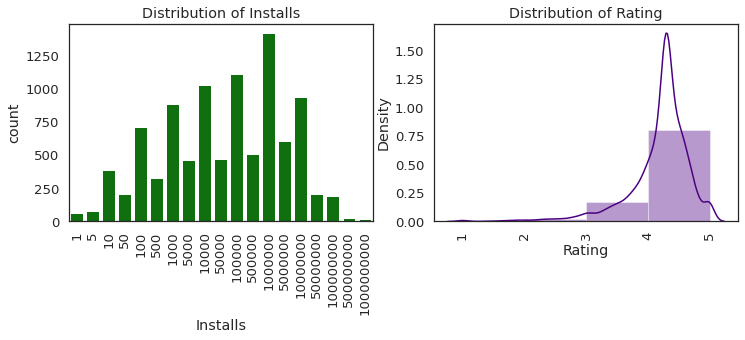

In [147]:
#Distribution plots of Performance Indicators
fig = plt.figure(figsize=(12,8))


plt.subplot(2,2,1)
sns.countplot(PS_df['Installs'],color='green')
plt.title('Distribution of Installs')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.distplot(PS_df['Rating'],bins=4,color='indigo')
plt.title('Distribution of Rating')
plt.xticks(rotation=90)


* Most of the apps in the Play store have a rating of at least 4.
* Majority of apps in the Google Play Store have fewer than five million downloads(**79.46%**).



In [148]:
#How many apps in the Play store have less than 5M downloads?
(PS_df[PS_df['Installs']<5000000].App.count())/(PS_df.App.nunique())*100

79.46827292553745

# **Correlation heatmap**

The correlation heatmap is a handy visualisation tool that allows us to see which numerical variables are correlated, to what extent they are correlated, and what sort of correlation they have (positive or negative). 


> So let's make use of this tool and try to figure out which features impact the app's ratings and installations


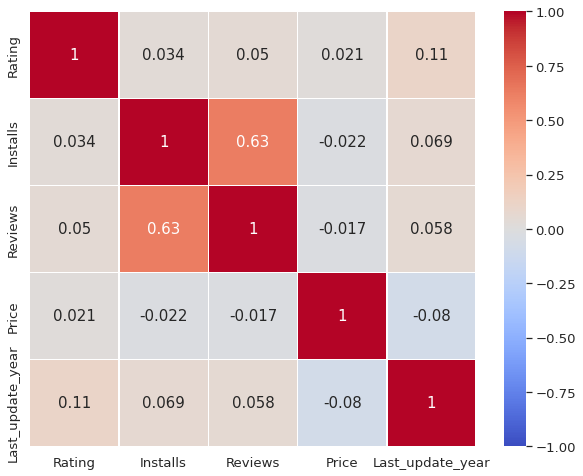

In [149]:
#Correlation heatmap of numerical features in Playstore dataset
plt.figure(figsize = (10,8))
sns.heatmap(PS_df[['Rating','Installs','Reviews','Price','Last_update_year']].corr(),vmin=-1,linewidth=0.5,cmap='coolwarm',annot=True,annot_kws={'size': 15})
sns.set(font_scale = 1.5 )

> How are the other features in heatmap related to **Rating**?

*   None of the features in the heatmap have a major correlation with rating except for the year of last update
*   The ratings of the applications seems to be *positively correlated* with year of last update.
*   There is also a slight *positive correlation* between Rating and Installs.The better rated apps have more installs and vice versa.
*   Price is negatively correlated with Rating

> What about **Installs**?

*  There is a strong *positive correlation* between Reviews and Installs.It is obvious that more Reviews will begin to flood in as the number of instals grows.So,they may be termed co-dependent.
*    The last update year can also bee seen to be *positively correlated* with the installs.
*    Price is negatively correlated with Installs
 

> Price is *negatively correlated* with all the other features in the heatmap.

# **Type**

Apps which can be installed without having to pay money are termed as Free apps.The ones which requires a certain amount to be paid in order to install them are the Paid apps.     

 ###  **What is the number of paid and free apps in Google Playstore?** 
 ###  **Are people equally likely to install paid and free apps?**
 ###  **What is the Rating distribution of free and paid apps?** 

Let's find out 

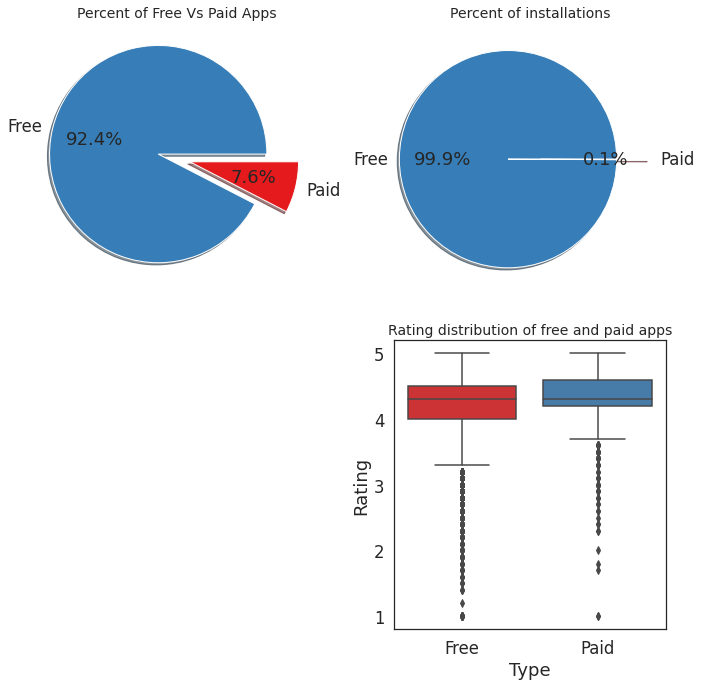

In [150]:
#Creating a dataframe which stores the number of paid and free apps and their sum of installs 

type_df=PS_df.groupby(['Type']).agg(no_of_apps=('App','count'),installs=('Installs','sum'))
sns.set_style('white')

# Setting figure colors and figure size
a=plt.cm.Set1
colors=[a(0.2),a(0.1)]
fig = plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
explode = (0.2,0.1)
plt.pie(type_df['no_of_apps'], explode=explode, labels=type_df.index,colors=colors , autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps ',size=14)

plt.subplot(2,2,2)
explode = (0.2,0.1)
plt.pie(type_df['installs'],explode=explode, labels=type_df.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of installations',size=14)

plt.subplot(2,2,4)
sns.boxplot(x='Type',y='Rating',data=PS_df,palette='Set1')
plt.title('Rating distribution of free and paid apps',size=14)
plt.tight_layout()


* It can be clearly seen that Free apps dominate the App market.
* Free apps garner the most number of installs
* Paid apps are slightly better rated than free apps

---

# **Content Rating**




Content Rating indicates the maturity level of the content in the apps.Does content rating affect the popularity of the app?Let's find out.



###   **How many apps are there specific to target audience?**
###  **Are there any differences in number of  app downloads depending on Content Ratings in the Playstore?**
### **Do apps belonging to various Content Rating get similar number of reviews?**

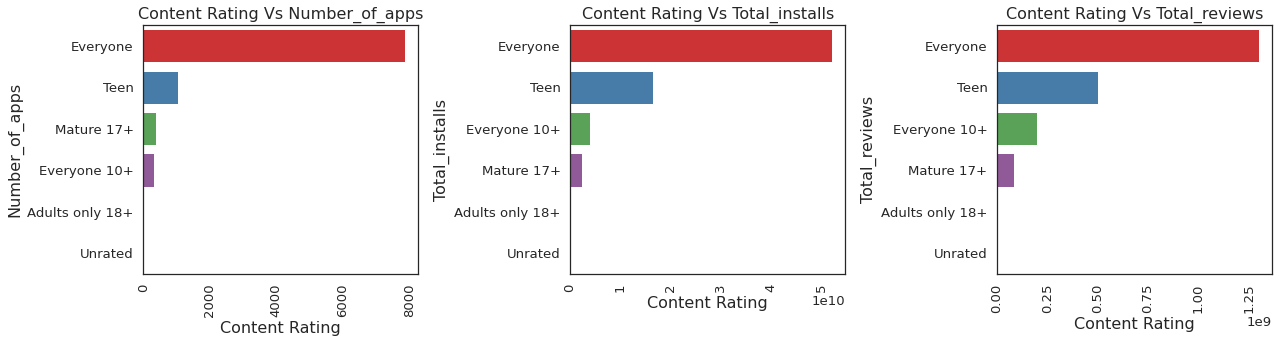

In [151]:
#Barplot showing the number of apps,downloads,reviews received by apps of various Content Ratings

content_df=PS_df.groupby(['Content Rating']).agg(Number_of_apps=('App','count'),Total_installs=('Installs','sum'),Total_reviews=('Reviews','sum')).reset_index()
                                        
list_=['Number_of_apps','Total_installs','Total_reviews']
fig = plt.figure(figsize=(18,5))
sns.set(font_scale=1.2)
sns.set_style('white')

for i in range(0,3):
  plt.subplot(1,3,i+1)
  content_df.sort_values(by=list_[i],ascending=False,inplace=True)
  sns.barplot(y='Content Rating',x=list_[i],data=content_df,palette='Set1')
  plt.title('Content Rating Vs {}'.format(list_[i]),size=16)
  plt.xticks(rotation=90)
  plt.ylabel(list_[i],size=16)
  plt.xlabel('Content Rating',size=16)
plt.tight_layout()


* Most of the apps available in Google playstore are suitable for audiences belonging to all age groups(Everyone)  and they have most number of installations and number of reviews.If your user base is big, there is a high chance your app gets more downloads.
*It looks like,there are very few apps with content ratings 'Adults only 18+' and 'Unrated' and hence they're virtually invisible in the bar plot.The installations for these apps are also very few.



---


# **App Price**

“***The moment you make a mistake in pricing, you're eating into your reputation or your profits***.” - Katharine Paine

The price of an app has a significant impact on people's willingness to install it. As a result, it's essential to ensure that the app is rightly priced and that the functions it offers are worth investing. 

  ###  **What is the distribution of prices for paid apps and how does the price of the app influence ratings and installs?**

In [152]:
#creating a dataframe consisting of paid apps
Paid_apps_df=PS_df[PS_df['Type']=='Paid']

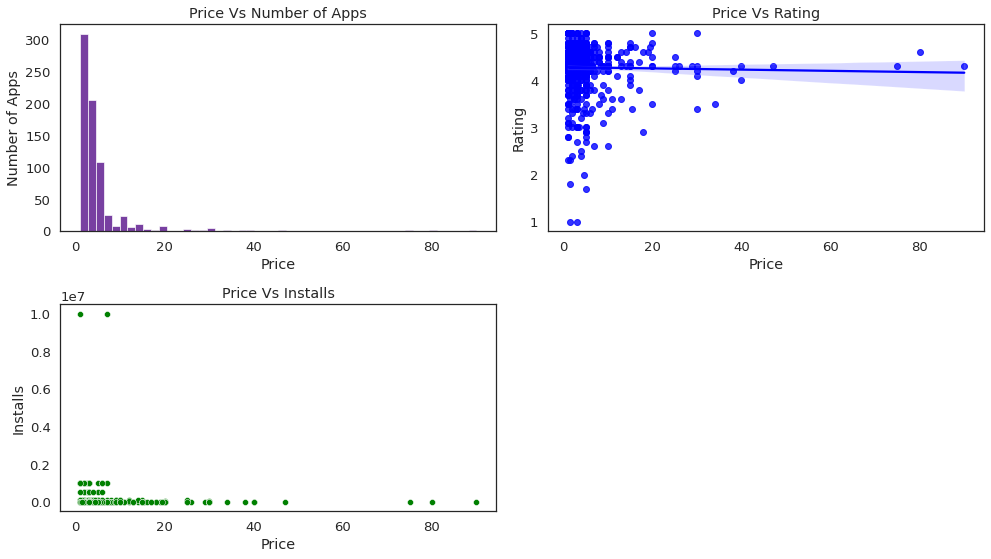

In [153]:
fig = plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.histplot(Paid_apps_df['Price'],color='indigo',bins=50)
plt.title('Price Vs Number of Apps')
plt.ylabel('Number of Apps')

plt.subplot(2,2,2)
sns.regplot(x='Price',y='Rating',data=Paid_apps_df,color='blue')
plt.title('Price Vs Rating')

plt.subplot(2,2,3)
sns.scatterplot(x='Price',y='Installs'
,data=Paid_apps_df,color='green')
plt.title('Price Vs Installs')

plt.tight_layout()

* Most of the paid apps have price below 10$.
* The rating and number of downloads of the paid apps seems to decrease with increase in price

---
# **Last update year**

### **How does the App rating and Number of installs vary with year of last update?**

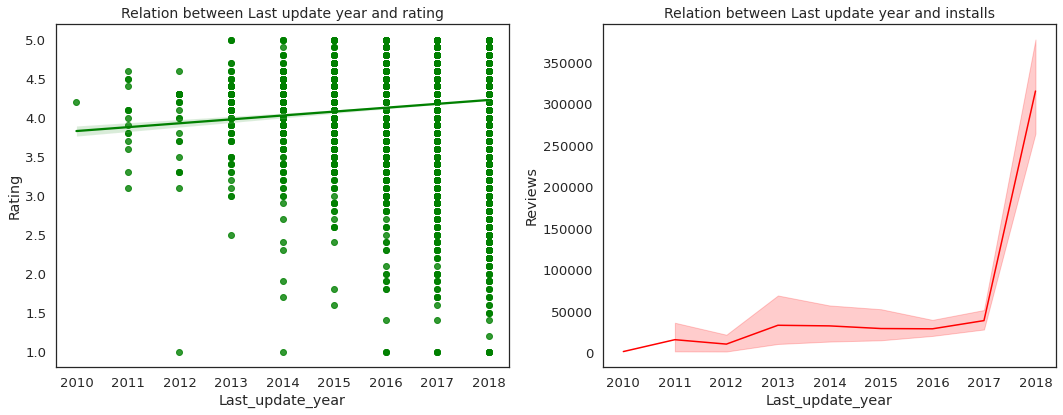

In [154]:
fig = plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.regplot(x='Last_update_year',y='Rating',data=PS_df,scatter=True,color='green')
plt.title('Relation between Last update year and rating',size=14)

plt.subplot(1,2,2)
sns.lineplot(x='Last_update_year',y='Reviews',data=PS_df,color='red')
plt.title('Relation between Last update year and installs',size=14)
plt.tight_layout()

* From the above plots,we can conclude that Apps which has been updated recently have higher chances of receiving better ratings and higher number of installations.
* Apps that are updated often tend to receive better ratings. Because users are aware that the developers are striving to improve the app and are paying attention to their feedback.
* The more dedicated you are to your product, the higher your rating will be.



---


# **App Size**

The size of an app indicates the amount of space required by the device to download it.Does the app size influence people's decision to install it?Are people willing to install apps of heavier size? 

  ### **What is size distribution of apps ?**
  
 ### **How does the size affect the rating and number of downloads of the app?**

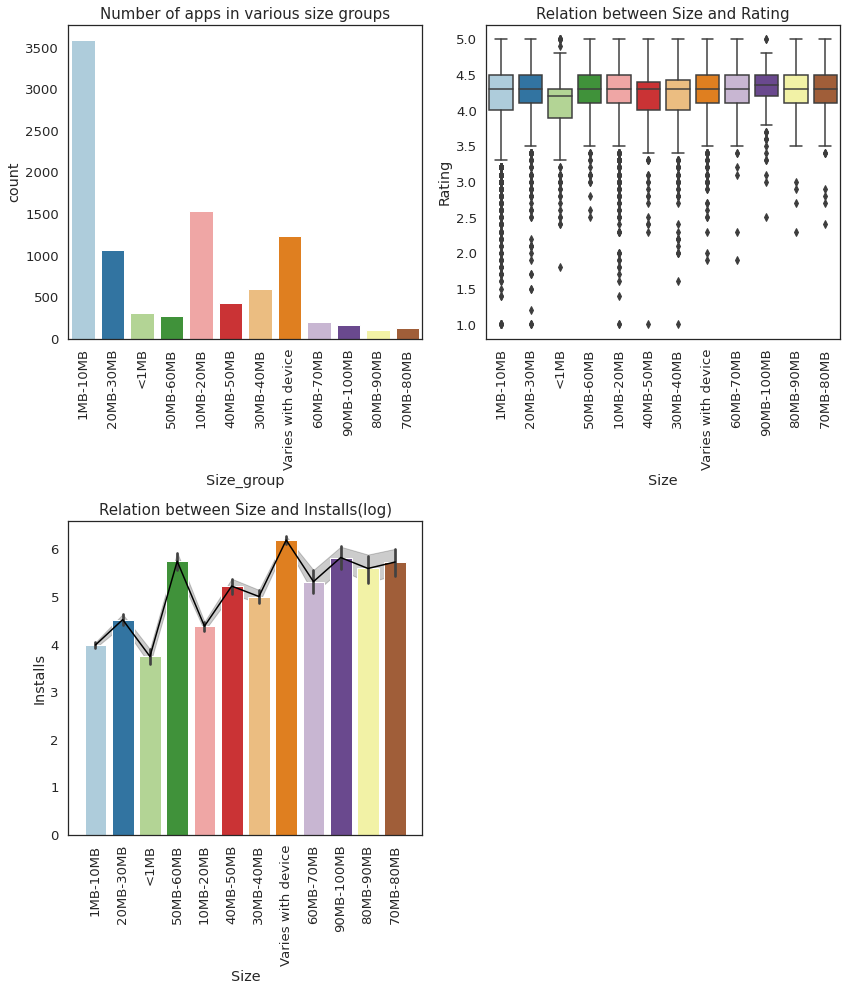

In [155]:

fig = plt.figure(figsize=(12,14))

plt.subplot(2,2,1)
sns.countplot(PS_df['Size_group'],palette='Paired')
plt.title('Number of apps in various size groups',size = 15)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Relation between Size and Rating',size = 15)
sns.boxplot(x='Size_group',y='Rating',data=PS_df,palette='Paired')
plt.xlabel("Size")
plt.ylabel("Rating")
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.title('Relation between Size and Installs(log)',size = 15)
sns.barplot(x='Size_group',y='log_installs',data=PS_df,palette='Paired',dodge=True)
sns.lineplot(x='Size_group',y='log_installs',data=PS_df,color='black')
plt.xlabel("Size")
plt.ylabel("Installs")
plt.xticks(rotation=90)

plt.tight_layout()

* Regardless of the size,most of the apps in all size ranges have managed to receive ratings above 4 (median value) . As size of app increases,it is less likely to receive poor ratings(below 3).It could due to availabilty of more features with the increasing size of the app.
* Apps with size that varies with device are downloaded the most
* Apps with size less than 1 MB have least downloads. 



It can be seen that Apps whose size varies with device has most number of installs,followed by apps with size greater than 40 MB are installed next. The large app sizes does not seem to be a detrimental factor for installations,which is why we see that apps with size greater than 40 MB also have good number of installs.People appear to be willing to install apps regardless of size as long as the content is satisfactory.



---


# **App Categories**
Grouping apps into multiple categories makes it very convenient for the users to find applications suitable for their requirement and makes the overall search experience hasslefree. From business point-of-view, this grouping feature in Google playstore has helped companies make their apps quickly and easily discoverable to the potential users.


 
 ## **What is the number of  paid and free apps in each category ?**

 ## **What are the most downloaded app categories?**
## **How does the rating distribution of various app categories look like?**



> 




In [195]:
#Finding the Number of apps,Sum of installs,Average Rating of each category
category_type=PS_df.groupby(['Category']).agg(no_of_apps=('App','count'),sum_installs=('Installs','sum'),avg_rating=('Rating','mean'),sum_reviews=('Reviews','sum')).reset_index()

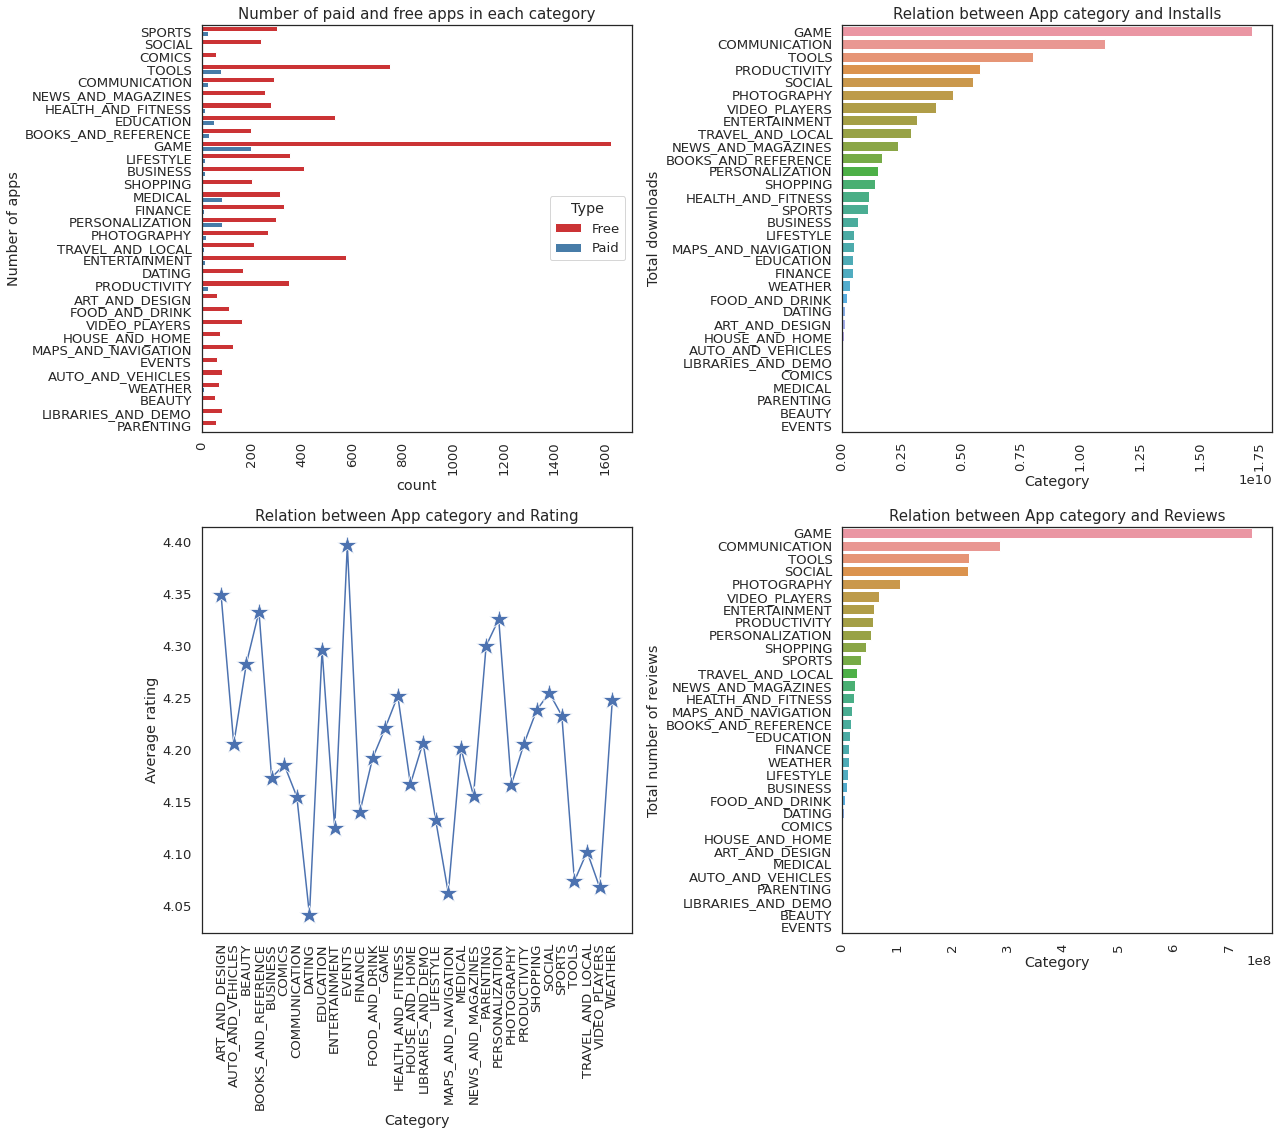

In [197]:
fig = plt.figure(figsize=(18,16))

plt.subplot(2,2,1)
plt.title('Number of paid and free apps in each category',size = 15)
sns.countplot(y='Category', hue='Type',data=PS_df, palette='Set1')
plt.ylabel('Number of apps')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Relation between App category and Installs',size = 15)
sns.barplot(y='Category',x='sum_installs',data=category_type.sort_values(by='sum_installs',ascending=False))
plt.xlabel("Category")
plt.ylabel("Total downloads")
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.title('Relation between App category and Rating',size = 15)
sns.lineplot(x='Category',y='avg_rating',data=category_type,marker='*',markersize=(20))
plt.xlabel("Category")
plt.ylabel("Average rating")
plt.xticks(rotation=90)

plt.subplot(2,2,4)
plt.title('Relation between App category and Reviews',size = 15)
sns.barplot(y='Category',x='sum_reviews',data=category_type.sort_values(by='sum_reviews',ascending=False))
plt.xlabel("Category")
plt.ylabel("Total number of reviews")
plt.xticks(rotation=90)


plt.tight_layout()

* Games,Tools and Entertainment  have the highest market prevelance.
* Interestingly, Education and Business apps are also catching up.
* The categories like Beauty,Comics,Art and Design,Parenting and Events have least number of apps.
* Games is the category with the most reviews and the most installations. Despite the fact that there aren't many communication apps available, they have still managed to get a lot of downloads. .
* Events category has the highest average rating.

# **Answering questions**

  ## **How does Size distribution of Apps belonging to different categories look like?**

Text(0.5, 1.0, 'Size distribution for different categories of apps ')

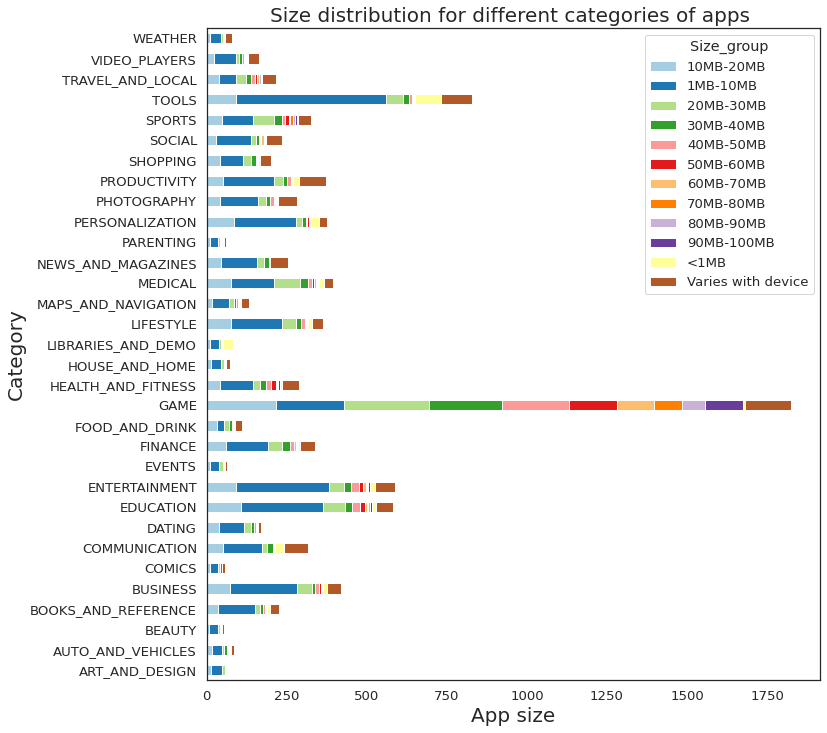

In [158]:

category_size = PS_df.groupby(['Category','Size_group'])['Size_group'].count().unstack('Size_group')
colors=[ a(i) for i in np.arange(0,2.2,0.1)]
category_size.plot(kind='barh', stacked=True,figsize=(11,12),color=plt.cm.Paired.colors)
plt.xlabel("App size",size=20)
plt.ylabel("Category",size=20)
plt.title('Size distribution for different categories of apps ',size = 20)


* The majority of applications in the Play Store are between 1MB-20MB in size. 
* Games has a wider distribution of sizes. 
* There are least number of apps  with a size of less than 1 MB.

  ## **How is the app category related to app price?**


Will people be prepared to pay a hefty price for a gaming app? Isn't it really unlikely? What about an app that is for medical or business purposes? It seems to be more possible.  So, Category is undoubtedly an important aspect to consider when setting an app's pricing.




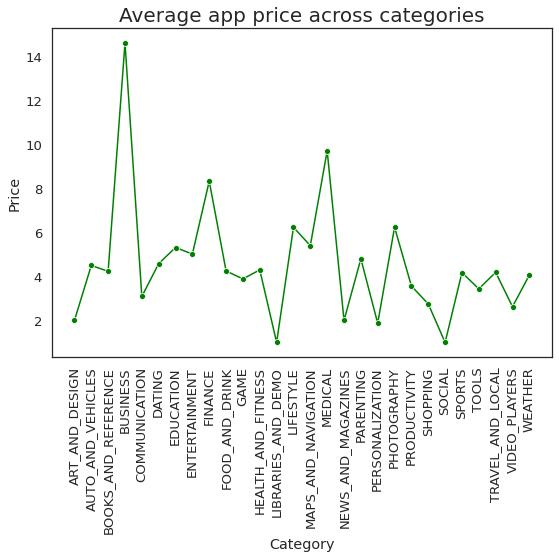

In [159]:

# Examine the average price trend by plotting Price vs Category
plt.figure(figsize=(8,8))
sns.lineplot(x = 'Category', y ='Price',data=Paid_apps_df.groupby('Category')['Price'].mean().reset_index(),marker='o',color='green')
plt.xticks(rotation=90)
plt.title('Average app price across categories',size=20)
plt.tight_layout()

## **Which is the best performing app category in Play store?**

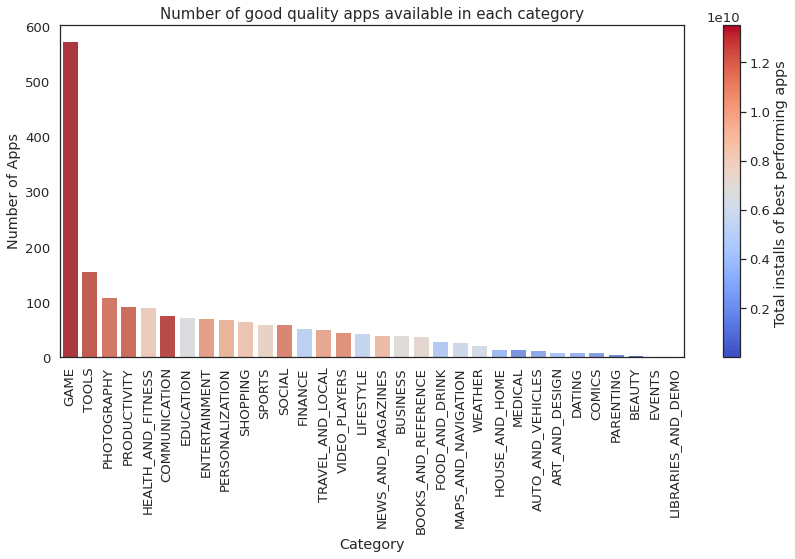

In [160]:
plt.figure(figsize=(12,8))
bestcategory_df=PS_df[(PS_df['Rating']>=4.3) & (PS_df['Installs']>=1000000)].groupby(['Category'],as_index=False).agg(
    no_of_apps=('App','count'),total_installs=('Installs','sum')).sort_values(by='no_of_apps',ascending=False)#defining the criteria for best performing apps

plot = plt.scatter(x='Category',y='no_of_apps', c='total_installs',data=bestcategory_df, cmap='coolwarm')
plt.clf()# plt.clf()
cbar=plt.colorbar(plot)#Creating a colormap
cbar.set_label('Total installs of best performing apps ')
#Number of good quality apps available in each category
ax = sns.barplot(x='Category',y='no_of_apps', hue='total_installs', data=bestcategory_df,palette='coolwarm', dodge=False)
ax.set_ylabel('Number of Apps')
plt.xticks(rotation=90)
ax.legend_.remove()
plt.title('Number of good quality apps available in each category',size=15)
plt.tight_layout()


   ## **Which are the apps that have made the highest earning?**

The price of an app is not the only factor which contributes to the earnings from an app.There are other factors like advertisements,in-app purchases etc.However,we don't have information regarding these factors in our dataset.So we cannot find out the earnings made by free apps and we'll limit analysis to paid apps.So,let us identify the paid apps which have made the most profits.

In [161]:
#Determining the earnings made by apps from the number of downloads/installs
Paid_apps_df['Earnings'] = Paid_apps_df['Installs'] * Paid_apps_df['Price']

Text(0.5, 0, 'Earnings')

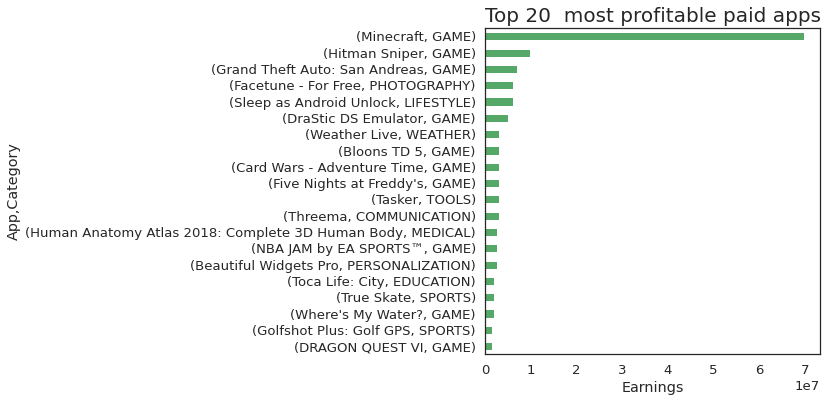

In [162]:
plt.title('Top 20  most profitable paid apps',size=20)
Paid_apps_df.groupby(['App','Category'])['Earnings'].sum().nlargest(20).plot.barh(figsize=(6,6), color='g').invert_yaxis()
plt.xlabel('Earnings')

*  **Minecraft** is the most profitable  paid app.
*Most of the top apps which have made highest profits belong to Games  category
















### **What are the apps in Play store which have 1 billion downloads?**

Text(0, 0.5, '(App name, Category)')

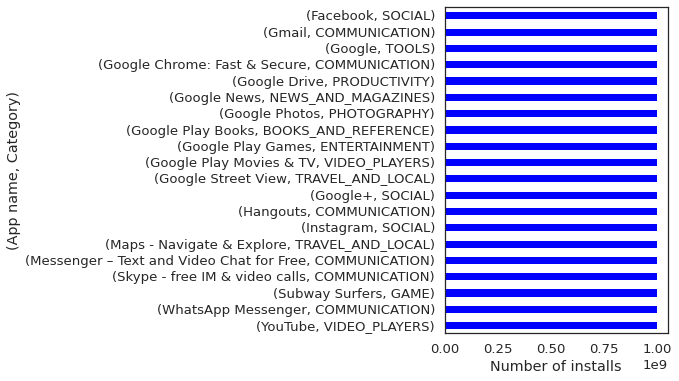

In [163]:
PS_df.groupby(['App','Category'])['Installs'].sum().nlargest(20).plot.barh(figsize=(4,6), color='blue').invert_yaxis()
plt.xlabel('Number of installs')
plt.ylabel('(App name, Category)')

There are 20 apps in play store that have crossed 1B downloads.There are 6 apps from COMMUNICATION,3 from SOCIAL categories

In [164]:
#Category of apps that have crossed 100 M downloads
PS_df.loc[PS_df['Installs']==10**9,['App','Category']].groupby('Category')['App'].count()

Category
BOOKS_AND_REFERENCE    1
COMMUNICATION          6
ENTERTAINMENT          1
GAME                   1
NEWS_AND_MAGAZINES     1
PHOTOGRAPHY            1
PRODUCTIVITY           1
SOCIAL                 3
TOOLS                  1
TRAVEL_AND_LOCAL       2
VIDEO_PLAYERS          2
Name: App, dtype: int64

### **What are the apps in Play store with most number of reviews?**

Text(0, 0.5, '(App name, Category)')

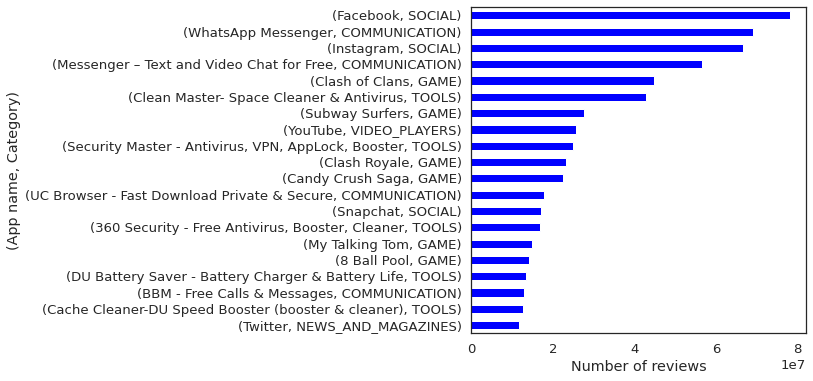

In [165]:
PS_df.groupby(['App','Category'])['Reviews'].sum().nlargest(20).plot.barh(figsize=(6,6), color='blue').invert_yaxis()
plt.xlabel('Number of reviews')
plt.ylabel('(App name, Category)')

Users tend to give reviews for the apps which they use often. So, a higher number of app reviews suggests that users are engaging with the app's content.

* SOCIAL(3),COMMUNICATION(4),Games(6),Tools(5),Video Players(1),News and Magazines(1)
* Facebook is the app with most number of reviews

# **Reviews of apps**

Always remember, "***Customer is the king***"

App ratings and  reviews left by consumers on Google PlayStore have a major impact on how Android users perceive your app. By looking at the app's reviews, a person can assess if the app works properly, caters to their requirement and addresses their issues.Then they'll decide whether or not to download the app. 

Here,the merged dataframe is used  to determine whether the sentiment regarding the app is good, negative, or neutral. 

## **Relation between Sentiment Polarity and Subjectivity**

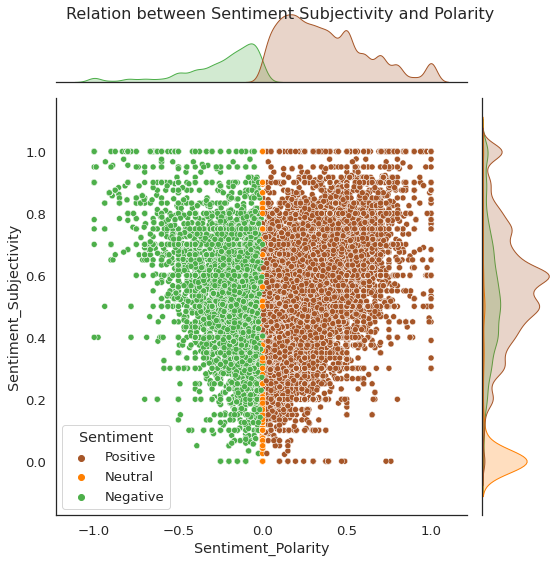

In [166]:
#Scatter plot of Sentiment Polarity Vs Subjectivity,along with their distribution(kde) plots
p=sns.jointplot(y='Sentiment_Subjectivity', x='Sentiment_Polarity',hue='Sentiment',data=new_df_merged, palette='Set1_r',height=8)#,hue='Sentiment',data=new_df_merged, palette='Set1',height=7)
p.fig.suptitle('Relation between Sentiment Subjectivity and Polarity',size = 16)
p.fig.tight_layout()

* There are more positive reviews than negative reviews, and the number of neutral reviews is the lowest. 
* Most user reviews have a sentiment polarity of [-0.5,0,5]. 
* The majority of positive and negative reviews are personal (subjectivity scores between [0.4,0.8]), whereas neutral user reviews are factual.

## **Relation between sentiment polarity of user reviews and user rating**

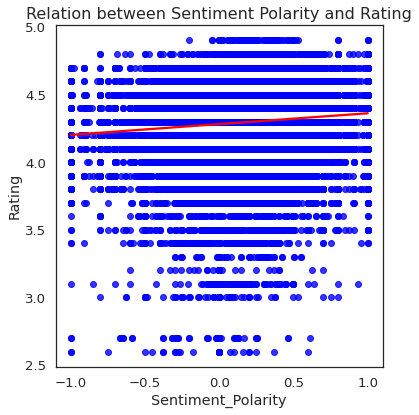

In [167]:
#Regression plot between sentiment polarity and rating
fig = plt.figure(figsize=(6,6))

plt.title('Relation between Sentiment Polarity and Rating',size = 16)
sns.regplot(x= 'Sentiment_Polarity',y='Rating',
                data=new_df_merged,color='blue',line_kws={"color": "red"})

plt.tight_layout()


* Positive reviews are more likely to be given to apps with higher ratings.

# **Answering questions**

   ### **What are the top 5 apps with the most positive reviews, and those with the most negative ones??**

In [168]:
apps_sentiment_count=new_df_merged.groupby('App',)['Sentiment'].value_counts().to_frame(name = 'Sentiment_Count').reset_index()

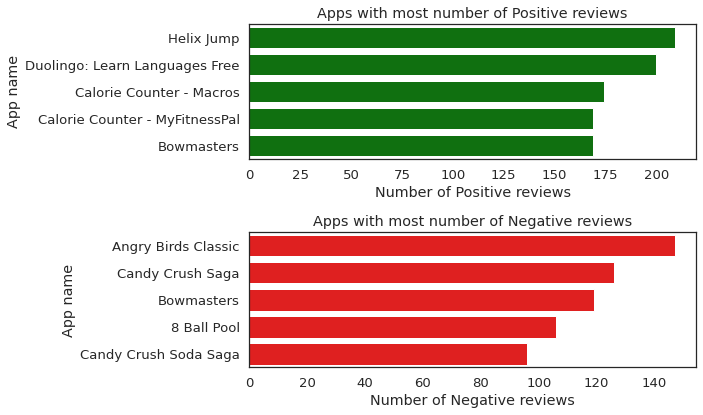

In [169]:

fig = plt.figure(figsize=(10,6))
sentiment=['Positive','Negative']
colours=['green','red']
i=1
for i in range(0,2):
  plt.subplot(2,1,i+1)
  #creating a dataframe of Apps and positive reviews count  
  df=apps_sentiment_count[apps_sentiment_count['Sentiment']==sentiment[i]]
  df.sort_values(by='Sentiment_Count',ascending=False,inplace=True)
  sns.barplot(x='Sentiment_Count',y='App',data=df.head(5),color=colours[i])
  plt.ylabel('App name')
  plt.xlabel('Number of {} reviews'.format(sentiment[i]))
  plt.title('Apps with most number of {} reviews'.format(sentiment[i]))

plt.tight_layout()


###**What is sentiment polarity of user reviews for paid and free apps?**

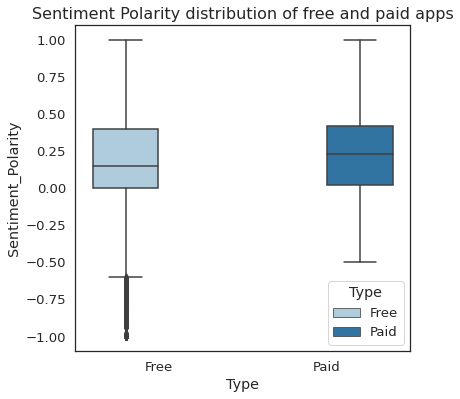

In [170]:
plt.figure(figsize=(6,6))
plt.title('Sentiment Polarity distribution of free and paid apps',size = 16)
sns.boxplot(x= 'Type',y='Sentiment_Polarity',data=new_df_merged,hue='Type',palette='Paired')

  ### **How does the sentiment of reviews across different categories look  like?**

In [171]:
category_sentiment_=new_df_merged.groupby('Category')['Sentiment'].value_counts().to_frame(name = 'Sentiment_Count').reset_index()

Text(0, 0.5, 'Number of reviews')

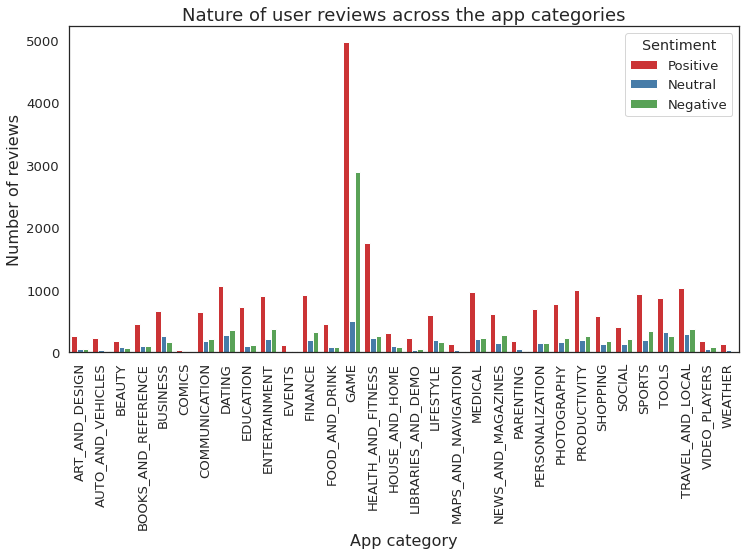

In [172]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.set_style('white')
sns.barplot(y=category_sentiment_['Sentiment_Count'],x='Category',data=category_sentiment_,hue='Sentiment',palette='Set1')
plt.title('Nature of user reviews across the app categories',size=18)
plt.xlabel('App category',size=16)
plt.ylabel('Number of reviews',size=16)


* Regardless of the category,it looks like most of the user reviews are positive in nature.
* Gaming apps have also received considerable number of negative reviews.
* Apps belonging to Health and Fitness show great performance,since they have fewer negative reviews when compared to it's number of positive reviews

## **Word clouds**

Word clouds is a visual representation of textual data.The words which appear frequently in the text appear larger and bolder in the word cloud and the less frequent words will be smaller in size.
Now let's find out the common/frequent words in User reviews with the help of this tool.

In [173]:
import re
def remove_characters(sentence):
    ''' 
    Removes unwanted characters from the sentence
    '''
    sentence=sentence.lower()
    sentence =  ' '.join(re.sub("[.,!?:;-='...\"@#_]", " ", sentence).split())
    return(sentence)

In [174]:

#removing unwanted characters from the translated reviews
new_df_merged['Translated_Review']=new_df_merged['Translated_Review'].apply(lambda x:remove_characters(x))

#adding words to stopwords
stopwords=list(STOPWORDS)+['im','applications','ur','u','apps','there','theres','what','this','whos','its',"app'"]

In [175]:
def create_wordcloud(name,Sentiment,df=new_df_merged,stopwords=stopwords):

  if name=='All':
    required_df=df.loc[(df['Sentiment']==Sentiment)]
  elif name in list(new_df_merged['Category'].unique()):
    required_df=df.loc[(df['Category']==name)&(df['Sentiment']==Sentiment)]
  else:
    required_df=df.loc[(df['App']==name)&(df['Sentiment']==Sentiment)]
  text = required_df['Translated_Review'].values
  wordcloud = WordCloud(width = 3000,height = 3000,background_color = 'white',stopwords = stopwords).generate(str(text))
  fig = plt.figure(figsize = (8, 8),facecolor = 'k',edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

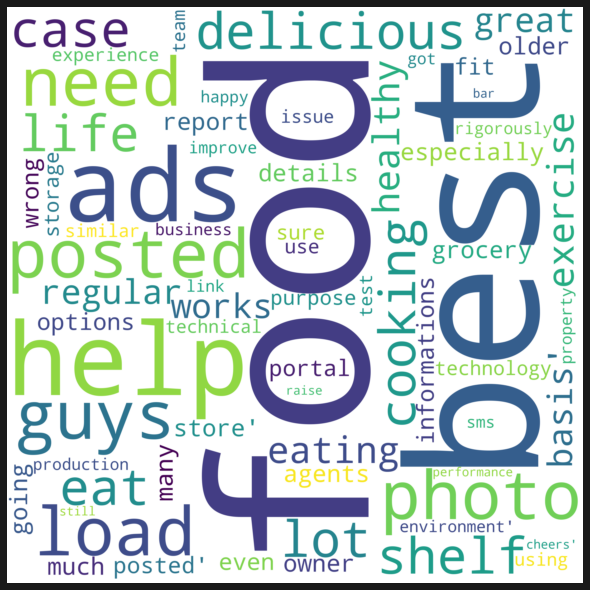

In [176]:
#Frequent words in all the positive reviews
create_wordcloud('All','Positive')

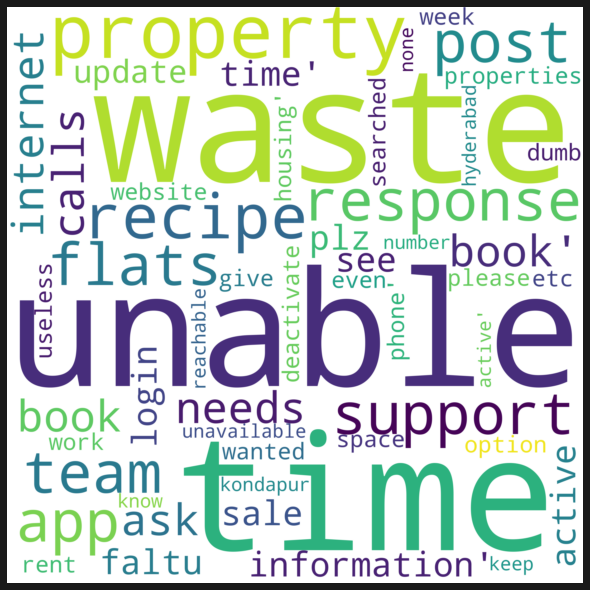

In [177]:
#Frequent words in all negative reviews
create_wordcloud('All','Negative')

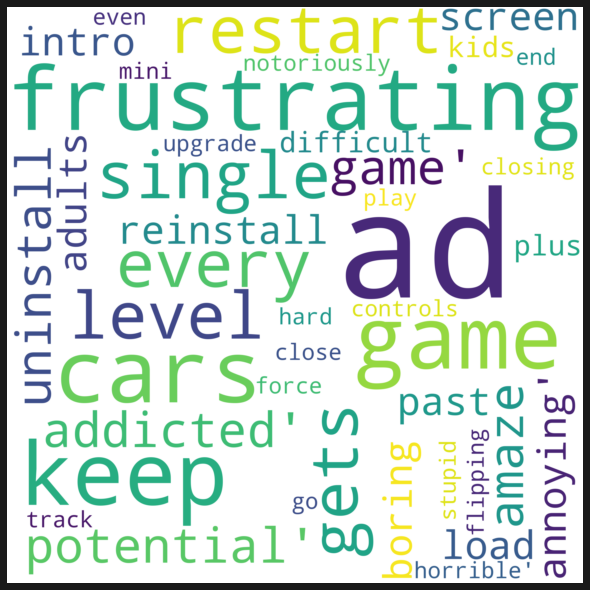

In [178]:
#Frequent words in negative reviews for games
create_wordcloud('GAME','Negative')

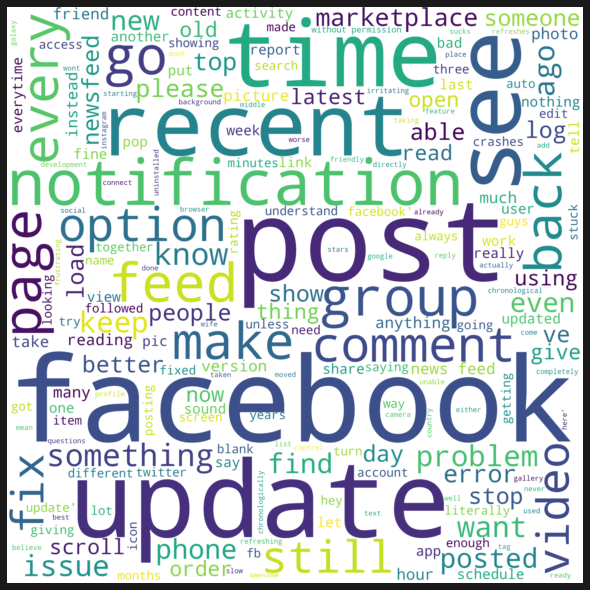

In [179]:
# Frequent words in negative reviews
create_wordcloud('Facebook','Positive')

# **Summary**

* There are Free apps have  are more popular among the users and has more market prevailance.
* Games has the highest share of apps in the app market,most downloads,most number of reviews.
* In terms of popularity based on total number of downloads,Game has the topmost position
* Best rated category is Events
* Apps catering 'Everyone' have the most downloads
* Apps with size that varies with device have the most number of installs
* 'Finance' category has the highest average price
* Higher priced apps have lower installs and ratings
* Top earning app is Minecraft.
* Apps updated recently have better ratings and number of downloads
* Recently updated apps have better rating and more number of downloads.
* The Rating and the Sentiment polarity of paid apps are better than free apps in general
*  


